In [35]:
import random
import torch

# ---- Reproducibility
seed = 42
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.04125011 0.02745052 0.00545646 ... 0.04173751 0.00068046 0.0055922 ]
 [0.04462341 0.02969533 0.00590267 ... 0.04515067 0.00073611 0.00604951]
 [0.08766201 0.05833603 0.01159571 ... 0.0886978  0.00144607 0.01188417]
 ...
 [0.07044017 0.04687549 0.00931764 ... 0.07127247 0.00116198 0.00954944]
 [0.47002916 0.31278809 0.06217425 ... 0.47558287 0.00775358 0.06372094]
 [0.41277747 0.27468908 0.05460114 ... 0.41765472 0.00680916 0.05595944]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.25595985  0.18356199 -0.02328583 ...  0.19317029 -0.07263315
   0.00856361]
 [-0.01736962 -0.03939463  0.02391264 ...  0.03887654 -0.00257918
   0.21204183]
 [-0.04093319 -0.10825339 -0.15893375 ...  0.23613397 -0.08182115
   0.04743955]
 ...
 [ 0.0088415   0.0866462   0.07506887 ... -0.14338941 -0.19513866
  -0.0423852 ]
 [ 0.40432879  0.23184879  0.15863858 ...  0.55454935  0.01953611
   0.03625673]
 [ 0.28568992  0.24879898  0.04951519 ...  0.43879846 -0.11706998
   0.12

In [36]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [37]:
mycebmf=  cEBMF(data= noisy_matrix) 

 

In [38]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([-0.2113,  0.0486, -0.1352,  0.3289, -0.2023, -0.1124,  0.1962,  0.1354,
        -0.1017,  0.0522, -0.0940,  0.2581, -0.2333, -0.1522, -0.2770,  0.0067,
        -0.0565, -0.2602, -0.0980,  0.0335,  0.0327,  0.1300, -0.1131,  0.4003,
         0.0318, -0.0399, -0.1223, -0.2453, -0.0940,  0.2526, -0.1824,  0.1135,
         0.1844,  0.0156,  0.1128, -0.2689,  0.4578,  0.1517, -0.1640,  0.0757,
         0.3625,  0.2808, -0.0752, -0.1016, -0.0736, -0.2478,  0.1833,  0.1527,
         0.0042, -0.0687])
tensor([ 0.0141, -0.2790,  0.2248,  0.0704, -0.0230, -0.1078,  0.1898, -0.2650,
        -0.1962,  0.0549,  0.0116, -0.2802, -0.1467,  0.1183,  0.1660,  0.1866,
         0.0204, -0.0232, -0.2111, -0.1656,  0.0428,  0.1409, -0.0312, -0.0524,
        -0.0670,  0.1785,  0.2224, -0.0702,  0.2139,  0.0926,  0.2545,  0.0561,
        -0.2072, -0.0072,  0.0452,  0.2673,  0.0611, -0.1013, -0.2837, -0.0880])


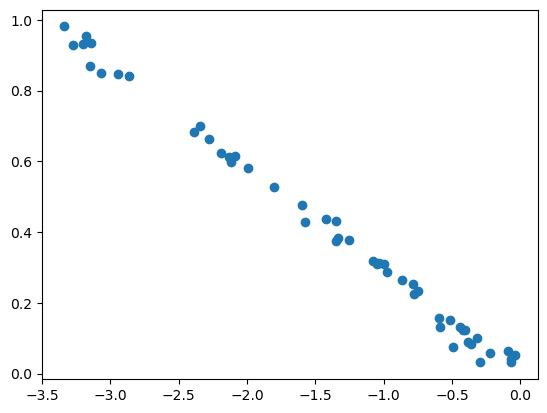

In [39]:
plt.scatter( mycebmf.L[:,0],u)

In [40]:
mycebmf.iter_once()
mycebmf.get_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor([[ 5.1893e-02,  7.8411e-02, -3.4546e-02,  ...,  4.9096e-02,
          5.6349e-02,  9.5126e-03],
        [-2.3878e-03,  1.0904e-04,  3.8191e-03,  ...,  4.3099e-03,
         -9.0574e-03,  2.2219e-03],
        [ 6.8480e-02,  7.6196e-02, -2.3621e-03,  ...,  9.5133e-02,
          4.1049e-03,  1.3482e-02],
        ...,
        [ 6.9562e-02,  9.1448e-03,  3.6505e-02,  ...,  6.5372e-02,
         -2.1939e-02, -4.0110e-03],
        [ 4.5261e-01,  3.4444e-01,  8.0846e-02,  ...,  4.5301e-01,
          1.6198e-02,  8.6571e-02],
        [ 3.6088e-01,  2.8861e-01,  7.2591e-02,  ...,  4.1737e-01,
         -1.6394e-02,  6.3680e-02]])

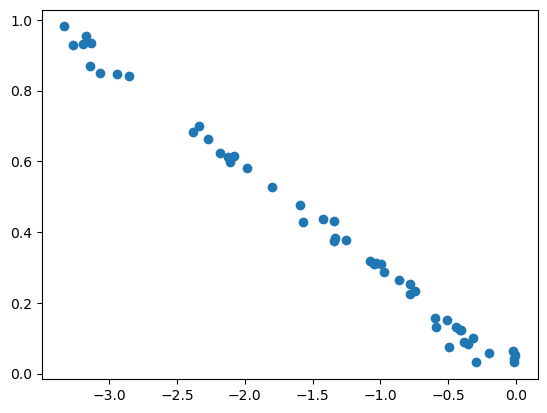

In [41]:
plt.scatter( mycebmf.L[:,0],u)

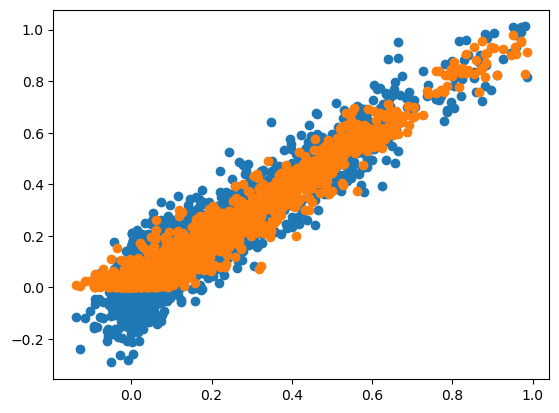

In [42]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [44]:
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

tensor(0.0023, dtype=torch.float64)